In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline
import json
from alpaca_trade_api.rest import REST, TimeFrame


In [14]:
# Load .env enviroment variables
load_dotenv()

True

In [15]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [17]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19001243,
            "total_supply": 19001243,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46157.0,
                    "volume_24h": 22649767987,
                    "market_cap": 875360158572,
                    "percentage_change_1h": 0.586562212123939,
                    "percentage_change_24h": -0.870663221633865,
                    "percentage_change_7d": 3.69735727702829,
                    "percent_change_1h": 0.586562212123939,
                    "percent_change_24h": -0.870663221633865,
                    "percent_change_7d": 3.69735727702829
                },
                "CAD": {
                    "price": 57788.564,
                    "volume_24h": 28357509519.724,
                    "

In [18]:
data_btc.keys()

dict_keys(['data', 'metadata'])

In [19]:
data_btc['data']['1']['quotes']['USD'].keys()

dict_keys(['price', 'volume_24h', 'market_cap', 'percentage_change_1h', 'percentage_change_24h', 'percentage_change_7d', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d'])

In [20]:
# Fetch current price
# Compute current value of my crpto
btc_value =  float(data_btc["data"]["1"]["quotes"]["CAD"]["price"])
my_btc_value = my_btc * btc_value
eth_value = float(data_eth["data"]["1027"]["quotes"]["CAD"]["price"])
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69346.28
The current value of your 5.3 ETH is $23027.26


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)


In [21]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [22]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [23]:
type(alpaca_api_key)

str

In [24]:
# Format current date as ISO format
start_date = "2022-03-21"
end_date = "2022-03-21"
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = TimeFrame.Day
# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars( tickers, timeframe, start_date, end_date, adjustment='raw').df
# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()




,open,high,low,close,volume,trade_count,vwap,symbol
2022-03-21,107.58,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21,444.45,446.460,440.6800,444.30,85377983,912432,443.796432,SPY


In [25]:
agg = df_portfolio[df_portfolio["symbol"] == "AGG"].drop("symbol", axis=1)
spy = df_portfolio[df_portfolio["symbol"] == "SPY"].drop("symbol", axis=1)

df_ticker = pd.concat([agg, spy], axis=1, keys=["AGG", "SPY"])
df_ticker.head()



AGG                                                  \
              open     high       low   close   volume trade_count   
2022-03-21  107.58  107.649  106.9841  107.04  7583668       27316   

                           SPY                                               \
                  vwap    open    high     low  close    volume trade_count   
2022-03-21  107.310151  444.45  446.46  440.68  444.3  85377983      912432   

                        
                  vwap  
2022-03-21  443.796432

In [26]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [27]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22215.00
The current value of your 200 AGG shares is $21408.00


## Saving Analysis

In [28]:
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
savings = [total_crypto, total_shares_value]

df_savings = pd.DataFrame(savings, columns=['Amount'], index=['Crypto','Shares'])
df_savings


,Amount
Crypto,92373.534056
Shares,43623.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

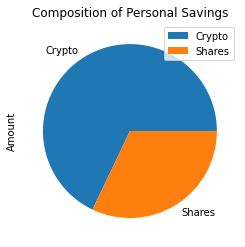

In [29]:
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")


In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have enough money in your emergency fund.


## Part Part 2 - Retirement Planning

## Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = "2017-03-20"
end_date = "2022-03-20"

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
df_stock.index=df_stock.index.date
df_stock=df_stock[['close', 'symbol']]

# Display sample data
df_stock.head()
pivot_table = pd.pivot_table(df_stock, values='close', index=df_stock.index, columns=['symbol'])


In [45]:
ticker = list(pivot_table.columns)
ticker = [(x,'close') for x in pivot_table.columns]
micolumns = pd.MultiIndex.from_tuples(ticker)
pivot_table.columns = micolumns
pivot_table

,AGG,SPY
,close,close
2017-03-20,108.05,236.77
2017-03-21,108.27,233.73
2017-03-22,108.42,234.28
2017-03-23,108.45,234.03
2017-03-24,108.36,233.86
...,...,...
2022-03-14,107.36,417.00
2022-03-15,107.60,426.17
2022-03-16,107.68,435.55


In [46]:
MC_dist= MCSimulation(
    portfolio_data = pivottable,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
MC_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahan\OneDrive\Documents\Jupyter\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002190,0.999718,1.011419,1.002606,1.004664,1.014362,0.993440,0.992497,1.003940,0.997563,...,1.002507,0.996308,0.996640,1.004796,0.996896,1.003142,0.988922,0.998647,1.003256,1.001215
2,1.005734,0.989402,1.014320,0.993054,1.007014,1.001244,0.985539,0.996122,1.003918,0.998700,...,1.004821,0.986297,0.997802,1.008756,0.990443,1.004961,0.988828,1.011286,1.001892,1.009703
3,1.004777,0.984031,1.022383,0.995387,1.005244,0.992829,0.976783,1.005798,0.994737,0.992579,...,1.007610,0.977019,0.996503,1.019697,0.991233,1.009915,0.978764,1.006251,0.996876,1.013411
4,1.003275,0.991008,1.020891,0.999484,1.016835,1.001494,0.975293,1.007697,0.982248,0.978764,...,0.997536,0.980741,0.994157,1.024591,0.994149,0.994574,0.970923,1.012003,0.988210,1.008172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.478460,8.409724,14.766742,5.956576,71.225385,2.889809,19.936357,12.565853,6.072998,2.176003,...,20.310351,6.132539,7.507886,8.876951,8.607137,6.081392,8.628493,8.488481,6.090340,18.619727
7557,2.468758,8.365562,14.688496,5.953411,71.659357,2.943046,19.781675,12.751141,6.036536,2.155530,...,20.353886,6.120694,7.460783,8.820610,8.648048,5.980960,8.652687,8.522957,6.075222,18.445844
7558,2.496392,8.322400,14.846621,5.949458,71.982716,2.928359,19.681998,12.776822,5.974532,2.167052,...,20.168065,6.119134,7.487865,8.792171,8.582021,5.930979,8.677083,8.553345,6.108886,18.277162
7559,2.536702,8.326293,14.780831,5.987492,71.711433,2.944232,19.960279,12.719293,5.958458,2.191209,...,20.247479,6.064877,7.528497,8.824704,8.601906,5.936461,8.715002,8.583944,6.108631,18.400751


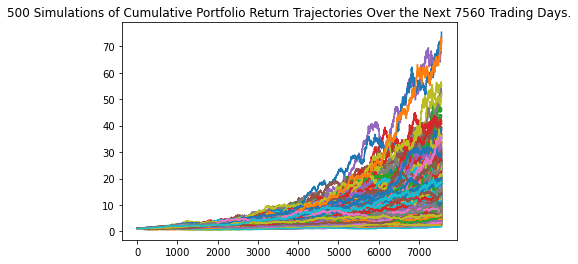

In [49]:
line_plot_ten = MC_dist.plot_simulation()


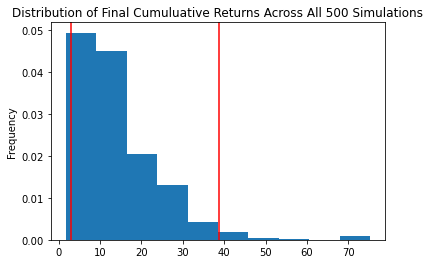

In [51]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist.plot_distribution()


In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean             14.424652
std              10.121800
min               1.709409
25%               7.375137
50%              12.209125
75%              18.440634
max              75.294515
95% CI Lower      2.962992
95% CI Upper     38.707676
Name: 7560, dtype: float64


In [54]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $177779.52 and $2322460.54


## Ten Years Retirement Option
